<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
*italicized text*They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [126]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [127]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [229]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/StatisticalNLP')

In [230]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/StatisticalNLP'

In [231]:
product_df = pd.read_csv('product_data.csv')
reviews_df = pd.read_csv('reviews.csv')

In [232]:
product_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [233]:
reviews_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [234]:
product_df.shape

(720, 10)

In [235]:
reviews_df.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [135]:
# prod_df=product_df.drop(columns=['url','image','reviewUrl'])

In [136]:
product_df.drop(['url','image','reviewUrl','title'],axis=1,inplace=True)

In [137]:
product_df.columns

Index(['asin', 'brand', 'rating', 'totalReviews', 'price', 'originalPrice'], dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [138]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   rating         720 non-null    float64
 3   totalReviews   720 non-null    int64  
 4   price          720 non-null    float64
 5   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 33.9+ KB


In [139]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [140]:
product_df.describe(include='all')

,asin,brand,rating,totalReviews,price,originalPrice
count,720,716,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,nan,nan,nan,nan
top,B01CJ3SCJ6,Samsung,nan,nan,nan,nan
freq,1,346,nan,nan,nan,nan
mean,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [141]:
reviews_df.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summry, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

### Inferences for Product Dataset

There are 10 unique brands and samsung is top brand with 48% records(346)

Prices ranges from 0 to 999.99

All products are unique in Product data set and there are 720 products

### Inferences for Reviews Dataset

There is total of 67986 reviews and there are 47323 unique reviewers 

Top reviewer is with name Amazon Customer and for product B00F2SKPIM

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

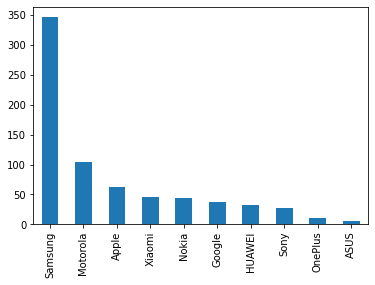

In [142]:
product_df['brand'].value_counts().plot(kind='bar')

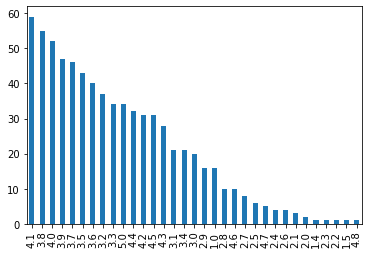

In [143]:
product_df['rating'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

In [144]:
product_df.groupby('brand').mean()['rating']

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

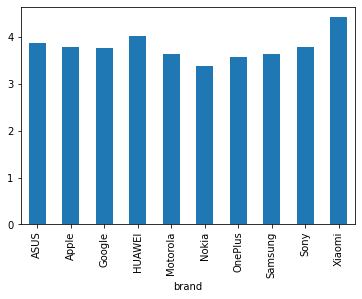

In [145]:
product_df.groupby('brand').mean()['rating'].plot(kind='bar')

### 4.6 Display average price per brand

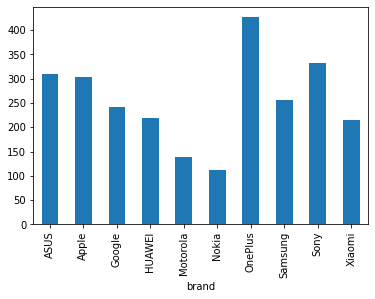

In [146]:
product_df.groupby('brand').mean()['price'].plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

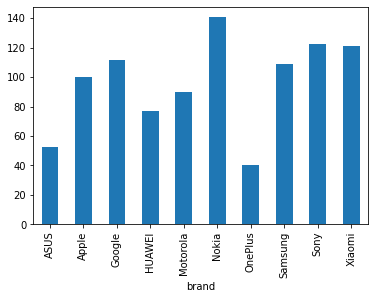

In [147]:
product_df.groupby('brand').mean()['totalReviews'].plot(kind='bar')

### Inferences

Nokia has more number of reviews but average rating for it is less (even Price)
More reviews given for lowest price product

Xiaomi has highest average rating and it not high price too

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [148]:
final_df=product_df.merge(reviews_df,how='inner',on='asin')

In [149]:
final_df.shape

(67986, 13)

In [150]:
## Another approach
merged_df=pd.merge(product_df,reviews_df,how='inner',on='asin')
merged_df.shape

(67986, 13)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [151]:
final_df.columns

Index(['asin', 'brand', 'rating_x', 'totalReviews', 'price', 'originalPrice',
       'name', 'rating_y', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [152]:
final_df.rename(columns={'rating_x':'user_rating','title_x':'review_title','title_y':'item_title','rating_y':'overall_rating'},inplace=True)


In [153]:
final_df.columns

Index(['asin', 'brand', 'user_rating', 'totalReviews', 'price',
       'originalPrice', 'name', 'overall_rating', 'date', 'verified', 'title',
       'body', 'helpfulVotes'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [154]:
verified_df=final_df[final_df['verified']]

In [155]:
verified_df.shape

(61225, 13)

### 4.11 Check the number of reviews for various brands and report the brands that have highest number of brands

In [156]:
verified_df.groupby('brand').count()['asin'].sort_values(ascending=False)

brand
Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: asin, dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [157]:
verified_df.drop(verified_df.columns.difference(['brand','body','price','user_rating','title']),axis=1,inplace=True)

In [158]:
verified_df.columns

Index(['brand', 'user_rating', 'price', 'title', 'body'], dtype='object')

In [159]:
verified_df.head()

,brand,user_rating,price,title,body
14,Motorola,3.0000000,49.9500000,Stupid phone,DON'T BUY OUT OF SERVICE
17,Motorola,3.0000000,49.9500000,Phones locked,1 star because the phones locked so I have to ...
18,Motorola,3.0000000,49.9500000,Excellent product,The product has been very good. I had used thi...
21,Motorola,2.7000000,99.9900000,"Nice, but",I bought this phone to replace an LG phone tha...
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

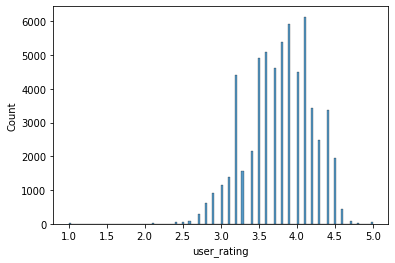

In [160]:
sns.histplot(verified_df['user_rating'])

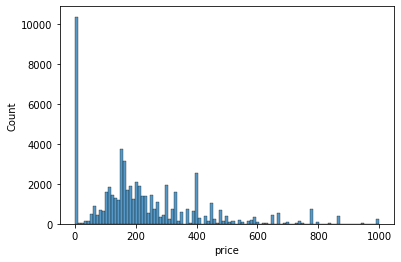

In [161]:
sns.histplot(verified_df['price'])

Data is skewed based on user rating as most of them have values > 3

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [162]:
def assign_sentiment(rating):
  if (rating==3):
    return 0
  elif (rating > 3):
    return 1
  else:
    return -1


verified_df['sentiment'] = verified_df['user_rating'].apply(lambda x: assign_sentiment(x))


In [163]:
verified_df['sentiment'].value_counts()

 1    57967
-1     2098
 0     1160
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

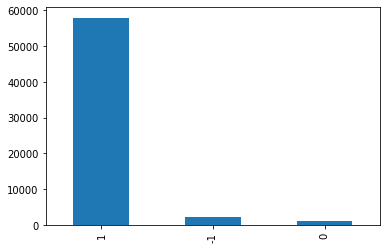

In [164]:
verified_df['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [165]:
pd.crosstab(verified_df['brand'],verified_df['sentiment'])

sentiment,-1,0,1
brand,,,
ASUS,1,0,205
Apple,65,0,4811
Google,283,18,2862
HUAWEI,2,1,2016
Motorola,461,578,6675
Nokia,192,217,4469
OnePlus,0,0,304
Samsung,1094,100,29826
Sony,0,246,2445


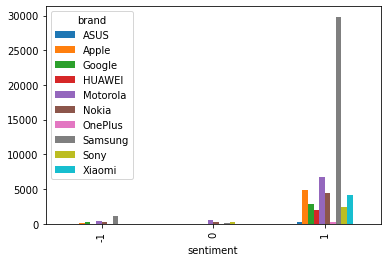

In [166]:
pd.crosstab(verified_df['brand'],verified_df['sentiment']).T.plot(kind='bar')

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [167]:
verified_df.head()

,brand,user_rating,price,title,body,sentiment
14,Motorola,3.0000000,49.9500000,Stupid phone,DON'T BUY OUT OF SERVICE,0
17,Motorola,3.0000000,49.9500000,Phones locked,1 star because the phones locked so I have to ...,0
18,Motorola,3.0000000,49.9500000,Excellent product,The product has been very good. I had used thi...,0
21,Motorola,2.7000000,99.9900000,"Nice, but",I bought this phone to replace an LG phone tha...,-1
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,-1


In [168]:
verified_df['body'].dtype

dtype('O')

In [169]:
verified_df['body'] = verified_df['body'].apply(lambda x : str(x).lower())

In [170]:
verified_df.head()

,brand,user_rating,price,title,body,sentiment
14,Motorola,3.0000000,49.9500000,Stupid phone,don't buy out of service,0
17,Motorola,3.0000000,49.9500000,Phones locked,1 star because the phones locked so i have to ...,0
18,Motorola,3.0000000,49.9500000,Excellent product,the product has been very good. i had used thi...,0
21,Motorola,2.7000000,99.9900000,"Nice, but",i bought this phone to replace an lg phone tha...,-1
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,i purchased this phone for my at&t phone repla...,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [171]:
verified_df['body']=verified_df['body'].replace('[^\w\s]','',regex=True)

In [172]:
verified_df.head()

,brand,user_rating,price,title,body,sentiment
14,Motorola,3.0000000,49.9500000,Stupid phone,dont buy out of service,0
17,Motorola,3.0000000,49.9500000,Phones locked,1 star because the phones locked so i have to ...,0
18,Motorola,3.0000000,49.9500000,Excellent product,the product has been very good i had used this...,0
21,Motorola,2.7000000,99.9900000,"Nice, but",i bought this phone to replace an lg phone tha...,-1
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,i purchased this phone for my att phone replac...,-1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [173]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [174]:
from nltk.corpus import stopwords

In [175]:
stop_w=set(stopwords.words('english'))

In [178]:
verified_df['body'] = verified_df['body'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_w))

In [179]:
verified_df.head()

,brand,user_rating,price,title,body,sentiment
14,Motorola,3.0000000,49.9500000,Stupid phone,dont buy service,0
17,Motorola,3.0000000,49.9500000,Phones locked,1 star phones locked pay additional fees unlock,0
18,Motorola,3.0000000,49.9500000,Excellent product,product good used cell phone one projects work...,0
21,Motorola,2.7000000,99.9900000,"Nice, but",bought phone replace lg phone didnt like expec...,-1
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,purchased phone att phone replacement even tho...,-1


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [181]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [183]:
from nltk.stem import WordNetLemmatizer

In [184]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])



In [189]:
lemmatize_text('talks')

'talk'

In [191]:
verified_df['body']=verified_df['body'].apply(lemmatize_text)

In [192]:
verified_df.head()

,brand,user_rating,price,title,body,sentiment
14,Motorola,3.0000000,49.9500000,Stupid phone,dont buy service,0
17,Motorola,3.0000000,49.9500000,Phones locked,1 star phone locked pay additional fee unlock,0
18,Motorola,3.0000000,49.9500000,Excellent product,product good used cell phone one project worke...,0
21,Motorola,2.7000000,99.9900000,"Nice, but",bought phone replace lg phone didnt like expec...,-1
22,Motorola,2.7000000,99.9900000,It seems it doesn't work with the existing AT&...,purchased phone att phone replacement even tho...,-1


### 5.5 Write a function to check word frequency of the text

In [210]:
## Using Count Vectorizer to Document term Matrix of words and their frequency

from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

In [211]:
cvect.fit(verified_df['body'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [212]:
## No of unique words
len(cvect.vocabulary_)

36034

In [215]:
verified_df_ct = cvect.transform(verified_df['body'])

In [216]:
#Size of Document Term Matrix
verified_df_ct.shape

(61225, 36034)

In [217]:
print(verified_df_ct[0])

  (0, 6546)	1
  (0, 10969)	1
  (0, 28599)	1


In [218]:
cvect.vocabulary_.keys()

dict_keys(['dont', 'buy', 'service', 'star', 'phone', 'locked', 'pay', 'additional', 'fee', 'unlock', 'product', 'good', 'used', 'cell', 'one', 'project', 'worked', 'wonder', 'definitely', 'recommend', 'anyone', 'interested', 'buying', 'bought', 'replace', 'lg', 'didnt', 'like', 'expected', 'put', 'old', 'sim', 'card', 'new', 'two', 'serious', 'drawback', 'device', 'related', 'candy', 'bar', 'style', 'first', 'button', 'exposed', 'easy', 'hit', 'accidentally', 'second', 'screen', 'easily', 'scratched', 'got', 'making', 'difficult', 'read', 'sunlight', 'aside', 'flaw', 'work', 'great', 'connectivity', 'battery', 'life', 'quality', 'voice', 'superb', 'since', 'texting', 'cant', 'comment', 'nice', 'small', 'came', 'case', 'could', 'find', 'would', 'perfect', 'need', 'price', 'right', '10', 'worth', 'calling', 'purchased', 'att', 'replacement', 'even', 'though', 'faq', 'mentioned', 'primary', 'stead', 'spending', 'time', 'see', 'reason', 'ill', 'go', 'specifically', 'say', 'unlocked', 'com

### 5.6 Check word frequency of review having top ratings (sentimet = 1) and display output of few samples

In [219]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [228]:
top_ratings = verified_df[verified_df['sentiment']==1]
top_ratings_body = top_ratings['body']
common_words = get_top_n_words(top_ratings_body, 20)
for word, freq in common_words:
    print(word, freq)

phone 76049
great 16307
good 12814
work 12758
battery 10942
like 10129
screen 10127
one 9754
new 8957
use 8279
love 7807
get 7795
camera 7303
would 6909
time 6493
price 6076
day 6051
im 5641
really 5410
samsung 5147


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [194]:
tfvec=TfidfVectorizer()

In [195]:
tfvec.fit(verified_df['body'].tolist())
len(tfvec.get_feature_names())

36034

In [196]:
tfdata=tfvec.fit_transform(verified_df['body'])

In [197]:
tfdata.shape

(61225, 36034)

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [198]:
X=tfdata
y=verified_df['sentiment']

### 5.9 Split the data into Train & Test Sets

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, 
    random_state=42
)

In [200]:
#Training data
print(X_train.shape)
print(y_train.shape)
# Testing data
print(X_test.shape)
print(y_test.shape)

(48980, 36034)
(48980,)
(12245, 36034)
(12245,)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
print(rf.score(X_train,y_train))

0.9935483870967742


In [203]:
print(rf.score(X_test,y_test))

0.944058799510004


In [207]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
print(conf_mat)

[[    5     1   447]
 [    0     2   213]
 [   13    11 11553]]


In [209]:
## Null Accuracy
## Since the data is biased towards higher rating consider rating 5 for all test data and accuracy will be
11577/12245

0.9454471212739893

## 7. Write your conclusion

### Null Accuracy is 94.5 which is close to Random Forest accuracy of 94.4. Hence the data looks to be more biased which doesn't require model to train and predict.

### There were biased features like Price (as majority of them have 0 values) which if having proper values would improve the score

### Target variable Sentiment is based on assumption 3 is neutral and if that is considered positive feedback score value would still be improved.